In [58]:
# Import library
import joblib
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [59]:
# !kaggle datasets download -d imuhammad/course-reviews-on-coursera

In [60]:
# zip_ref = ZipFile('course-reviews-on-coursera.zip')
# zip_ref.extractall("/content")
# zip_ref.close()

In [61]:
courses_df = pd.read_excel(r'D:\Bismillah SKRIPSIIIII\REVISI\dataset\courses.xlsx')
reviews_df = pd.read_excel(r'D:\Bismillah SKRIPSIIIII\REVISI\dataset\user.xlsx')

# Courses

In [62]:
courses_df.head()

,name,course_url,course_id,rating,Unnamed: 4,Unnamed: 5
0,AI For Everyone,https://www.coursera.org/learn/ai-for-everyone,9,4.84,NaN,NaN
1,AWS Fundamentals: Addressing Security Risk,https://www.coursera.org/learn/aws-fundamental...,353,4.16,NaN,NaN
2,AWS Fundamentals: Going Cloud-Native,https://www.coursera.org/learn/aws-fundamental...,118,4.68,NaN,NaN
3,Agile with Atlassian Jira,https://www.coursera.org/learn/agile-atlassian...,40,4.66,NaN,NaN
4,Applied Data Science Capstone,https://www.coursera.org/learn/applied-data-sc...,344,4.51,NaN,NaN


In [63]:
courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        132 non-null    object 
 1   course_url  132 non-null    object 
 2   course_id   132 non-null    object 
 3   rating      132 non-null    object 
 4   Unnamed: 4  10 non-null     float64
 5   Unnamed: 5  4 non-null      float64
dtypes: float64(2), object(4)
memory usage: 6.3+ KB


In [64]:
courses_df = courses_df.drop(columns=['Unnamed: 4', 'Unnamed: 5'])
courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        132 non-null    object
 1   course_url  132 non-null    object
 2   course_id   132 non-null    object
 3   rating      132 non-null    object
dtypes: object(4)
memory usage: 4.2+ KB


In [65]:
courses_df.describe()

,name,course_url,course_id,rating
count,132,132,132,132
unique,132,131,132,70
top,AI For Everyone,Part 1,9,4.76
freq,1,2,1,7


In [66]:
courses_df.duplicated().sum()

0

# Reviews

In [67]:
reviews_df.head()

,name,course_url,course_id,reviewers,rating,user_id,Unnamed: 6,Unnamed: 7
0,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Bruno C,1,1,NaN,NaN
1,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Fadi,1,2,NaN,NaN
2,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Mathew L,1,3,NaN,NaN
3,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Rui C,1,4,NaN,NaN
4,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Mehdi A,1,5,NaN,NaN


In [68]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246425 entries, 0 to 246424
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   name        246425 non-null  object 
 1   course_url  246425 non-null  object 
 2   course_id   246425 non-null  object 
 3   reviewers   246418 non-null  object 
 4   rating      246419 non-null  object 
 5   user_id     246424 non-null  object 
 6   Unnamed: 6  16721 non-null   float64
 7   Unnamed: 7  7496 non-null    float64
dtypes: float64(2), object(6)
memory usage: 15.0+ MB


In [69]:
reviews_df = reviews_df.drop(columns=['Unnamed: 6', 'Unnamed: 7'])
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246425 entries, 0 to 246424
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   name        246425 non-null  object
 1   course_url  246425 non-null  object
 2   course_id   246425 non-null  object
 3   reviewers   246418 non-null  object
 4   rating      246419 non-null  object
 5   user_id     246424 non-null  object
dtypes: object(6)
memory usage: 11.3+ MB


In [70]:
reviews_df.describe(include='all')

,name,course_url,course_id,reviewers,rating,user_id
count,246425,246425,246425,246418,246419,246424
unique,130,130,130,137722,8947,144918
top,Programming for Everybody (Getting Started wit...,https://www.coursera.org/learn/python,7,32,5,5
freq,14478,14478,14478,5978,170531,7405


In [71]:
reviews_df.duplicated().sum()

55

In [72]:
reviews_df.isnull().sum()

name          0
course_url    0
course_id     0
reviewers     7
rating        6
user_id       1
dtype: int64

In [73]:
num_of_reviews_by_course_df = reviews_df['course_id'].value_counts().reset_index()
more_500_reviews_df = num_of_reviews_by_course_df[num_of_reviews_by_course_df['count'] > 500]
more_500_reviews_df

,course_id,count
0,7,14478
1,1,11818
2,12,11611
3,4,11204
4,26,10868
...,...,...
105,360,545
106,405,537
107,and Dictionaries,531
108,413,521


In [74]:
# Menghitung jumlah review per user_id
num_of_reviews_by_user_df = reviews_df['user_id'].value_counts().reset_index()
num_of_reviews_by_user_df.columns = ['user_id', 'count']

# Memilih user_id dengan review >= 5
valid_users_df = num_of_reviews_by_user_df[num_of_reviews_by_user_df['count'] >= 5]

# Filter reviews_df dengan user_id yang valid
filtered_reviews_df = reviews_df[reviews_df['user_id'].isin(valid_users_df['user_id'])]

# Menampilkan hasil
filtered_reviews_df


,name,course_url,course_id,reviewers,rating,user_id
0,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Bruno C,1,1
1,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Fadi,1,2
2,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Mathew L,1,3
3,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Rui C,1,4
4,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Mehdi A,1,5
...,...,...,...,...,...,...
246387,Object Oriented Programming in Java,https://www.coursera.org/learn/object-oriented...,414,Zhao Y,5,60790
246399,Object Oriented Programming in Java,https://www.coursera.org/learn/object-oriented...,414,Ram P,5,9427
246404,Object Oriented Programming in Java,https://www.coursera.org/learn/object-oriented...,414,maripalli s,5,53546
246414,Object Oriented Programming in Java,https://www.coursera.org/learn/object-oriented...,414,Suraj M,5,38756


In [75]:
# Menghapus data abnormal
def remove_abnormal_data(filtered_reviews_df):
    # Konversi kolom rating ke float, ubah non-angka menjadi NaN
    filtered_reviews_df['rating'] = pd.to_numeric(filtered_reviews_df['rating'], errors='coerce')
    
    # Hanya menyertakan data dengan rating valid (1-5)
    filtered_reviews_df = filtered_reviews_df[(filtered_reviews_df['rating'] >= 1) & (filtered_reviews_df['rating'] <= 5)]
    
    # Menghapus baris dengan kolom penting yang kosong
    filtered_reviews_df = filtered_reviews_df.dropna(subset=['name', 'course_url', 'course_id', 'reviewers', 'rating', 'user_id'])
    
    # # Menghapus baris dengan teks terlalu pendek di kolom tertentu (opsional)
    # if 'reviews' in filtered_reviews_df.columns:
    #     filtered_reviews_df = filtered_reviews_df[filtered_reviews_df['reviews'].notna() & (filtered_reviews_df['reviews'].str.len() > 5)]
    # filtered_reviews_df = filtered_reviews_df[filtered_reviews_df['name'].notna() & (filtered_reviews_df['name'].str.len() > 10)]
    
    return filtered_reviews_df

# Bersihkan data
filtered_reviews_df = remove_abnormal_data(filtered_reviews_df)

# Menampilkan hasil
filtered_reviews_df


C:\Users\Tazkiiia\AppData\Local\Temp\ipykernel_25688\637436855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_reviews_df['rating'] = pd.to_numeric(filtered_reviews_df['rating'], errors='coerce')


,name,course_url,course_id,reviewers,rating,user_id
0,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Bruno C,1.0,1
1,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Fadi,1.0,2
2,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Mathew L,1.0,3
3,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Rui C,1.0,4
4,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Mehdi A,1.0,5
...,...,...,...,...,...,...
246387,Object Oriented Programming in Java,https://www.coursera.org/learn/object-oriented...,414,Zhao Y,5.0,60790
246399,Object Oriented Programming in Java,https://www.coursera.org/learn/object-oriented...,414,Ram P,5.0,9427
246404,Object Oriented Programming in Java,https://www.coursera.org/learn/object-oriented...,414,maripalli s,5.0,53546
246414,Object Oriented Programming in Java,https://www.coursera.org/learn/object-oriented...,414,Suraj M,5.0,38756


In [76]:
filtered_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53323 entries, 0 to 246424
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        53323 non-null  object 
 1   course_url  53323 non-null  object 
 2   course_id   53323 non-null  object 
 3   reviewers   53323 non-null  object 
 4   rating      53323 non-null  float64
 5   user_id     53323 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.8+ MB


In [77]:
filtered_reviews_df.to_csv('nyoba.csv', index=False)

In [78]:
num_of_reviews_by_course_df['course_id'] = num_of_reviews_by_course_df['course_id'].astype(str)
filtered_reviews_df = num_of_reviews_by_course_df[num_of_reviews_by_course_df['course_id'].str.isdigit()]
filtered_reviews_df['course_id'] = filtered_reviews_df['course_id'].astype(int)
filtered_reviews_df


C:\Users\Tazkiiia\AppData\Local\Temp\ipykernel_25688\3507023539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_reviews_df['course_id'] = filtered_reviews_df['course_id'].astype(int)


,course_id,count
0,7,14478
1,1,11818
2,12,11611
3,4,11204
4,26,10868
...,...,...
125,239,223
126,384,215
127,214,198
128,213,191


In [79]:
filtered_reviews_df['course_id'].nunique()

121

# Data Cleaning

In [80]:
filtered_reviews_df = filtered_reviews_df[['reviewers','rating','course_id']].copy()

# Ambil kursus yang hanya memiliki lebih dari 500 reviews
filtered_reviews_df = filtered_reviews_df[filtered_reviews_df['course_id']\
                                .isin(set(more_500_reviews_df['course_id']))]

filtered_reviews_df.dropna(inplace=True)

# Hapus data duplikat
filtered_reviews_df.drop_duplicates(inplace=True)

filtered_reviews_df.head()

KeyError: "['reviewers', 'rating'] not in index"

In [ ]:
filtered_reviews_df.shape

(232578, 3)

In [ ]:
filtered_reviews_df['course_id'].nunique()

110

In [97]:
merged_df = pd.merge(courses_df[['name','course_url','course_id']],
                     filtered_reviews_df,
                     on='course_id')

merged_df.head()

,name,course_url,course_id,reviewers,rating
0,AI For Everyone,https://www.coursera.org/learn/ai-for-everyone,9,Jean-Philippe B,1
1,AI For Everyone,https://www.coursera.org/learn/ai-for-everyone,9,Jelle F H,1
2,AI For Everyone,https://www.coursera.org/learn/ai-for-everyone,9,Sophie C,1
3,AI For Everyone,https://www.coursera.org/learn/ai-for-everyone,9,Binay S,1
4,AI For Everyone,https://www.coursera.org/learn/ai-for-everyone,9,Mariyada K,1


# Data Preparation

run start from here

In [81]:
data_prep_df = pd.read_csv(r'D:\Bismillah SKRIPSIIIII\REVISI\model\nyoba.csv')
data_prep_df.head()

,name,course_url,course_id,reviewers,rating,user_id
0,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Bruno C,1.0,1
1,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Fadi,1.0,2
2,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Mathew L,1.0,3
3,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Rui C,1.0,4
4,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Mehdi A,1.0,5


In [82]:
data_prep_df = data_prep_df.copy()

users_list = data_prep_df['reviewers'].unique().tolist()
courses_list = data_prep_df['course_id'].unique().tolist()

# Encode users dan courses
users_encoded = {user: i+1 for i, user in enumerate(users_list)}
courses_encoded = {course: i+1 for i, course in enumerate(courses_list)}

# Decode users dan courses
users_decoded = {i+1: user for i, user in enumerate(users_list)}
courses_decoded = {i+1: course for i, course in enumerate(courses_list)}

In [83]:
data_prep_df = data_prep_df.copy()
data_prep_df['user_id'] = data_prep_df['reviewers'].map(users_encoded)
data_prep_df['course_id'] = data_prep_df['course_id'].map(courses_encoded)

data_prep_df.head()

,name,course_url,course_id,reviewers,rating,user_id
0,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Bruno C,1.0,1
1,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Fadi,1.0,2
2,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Mathew L,1.0,3
3,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Rui C,1.0,4
4,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Mehdi A,1.0,5


In [84]:
def is_valid_rating(value):
    try:
        value = float(value)
        return 1 <= value <= 5
    except ValueError:
        return False

data_prep_df = data_prep_df[data_prep_df['rating'].apply(is_valid_rating)]

data_prep_df['rating'] = data_prep_df['rating'].astype(np.float32)

# Menentukan jumlah pengguna, jumlah kursus, min, dan max rating
users_encoded = data_prep_df['user_id'].unique()
courses_encoded = data_prep_df['course_id'].unique()

num_users = len(users_encoded)
num_courses = len(courses_encoded)

min_rating = min(data_prep_df['rating'])
max_rating = max(data_prep_df['rating'])

print(f'Number of User: {num_users}\nNumber of Course: {num_courses}\nMin Rating: {min_rating}\nMax Rating: {max_rating}')


Number of User: 6317
Number of Course: 122
Min Rating: 1.0
Max Rating: 5.0


In [85]:
data_prep_df = data_prep_df.sample(frac=1, random_state=42)
data_prep_df.head()

,name,course_url,course_id,reviewers,rating,user_id
8191,The Bits and Bytes of Computer Networking,https://www.coursera.org/learn/computer-networ...,4,Olouwole A,5.0,3027
22652,Mathematics for Machine Learning: Linear Algebra,https://www.coursera.org/learn/linear-algebra-...,20,SUJITH V,5.0,4946
37288,Essential Google Cloud Infrastructure: Foundation,https://www.coursera.org/learn/gcp-infrastruct...,50,James W,5.0,1332
33883,Databases and SQL for Data Science,https://www.coursera.org/learn/sql-data-science,41,James C,5.0,2192
49514,AWS Fundamentals: Addressing Security Risk,https://www.coursera.org/learn/aws-fundamental...,104,Ganesh K,4.0,3684


In [115]:
final_rating_df = data_prep_df[['name', 'course_url','rating', 'course_id']].copy()
final_rating_df = final_rating_df.groupby(['name',
                                           'course_url',
                                           'course_id']
                                          )['rating'].mean().reset_index()
final_rating_df['rating'] = round(final_rating_df['rating'], 2)
final_rating_df.head()

,name,course_url,course_id,rating
0,AI For Everyone,https://www.coursera.org/learn/ai-for-everyone,5,4.84
1,AI for Medical Diagnosis,https://www.coursera.org/learn/ai-for-medical-...,63,4.65
2,AWS Fundamentals: Addressing Security Risk,https://www.coursera.org/learn/aws-fundamental...,104,4.13
3,AWS Fundamentals: Going Cloud-Native,https://www.coursera.org/learn/aws-fundamental...,47,4.60
4,Agile with Atlassian Jira,https://www.coursera.org/learn/agile-atlassian...,16,4.61


In [ ]:
#Menyimpan data user
# final_rating_df.to_csv('final_rating_df2.csv', index=False)

# Data Splitting

In [88]:
final_df = data_prep_df.copy()

def remove_abnormal_data(final_df):
    final_df['rating'] = pd.to_numeric(final_df['rating'], errors='coerce')
    
    final_df = final_df[(final_df['rating'] >= 1) & (final_df['rating'] <= 5)]
    
    final_df = final_df.dropna(subset=['name', 'course_url','course_id', 'reviewers', 'rating',	'user_id'])
    
    return final_df

final_df_cleaned = remove_abnormal_data(final_df)
final_df_cleaned

,name,course_url,course_id,reviewers,rating,user_id
8191,The Bits and Bytes of Computer Networking,https://www.coursera.org/learn/computer-networ...,4,Olouwole A,5.0,3027
22652,Mathematics for Machine Learning: Linear Algebra,https://www.coursera.org/learn/linear-algebra-...,20,SUJITH V,5.0,4946
37288,Essential Google Cloud Infrastructure: Foundation,https://www.coursera.org/learn/gcp-infrastruct...,50,James W,5.0,1332
33883,Databases and SQL for Data Science,https://www.coursera.org/learn/sql-data-science,41,James C,5.0,2192
49514,AWS Fundamentals: Addressing Security Risk,https://www.coursera.org/learn/aws-fundamental...,104,Ganesh K,4.0,3684
...,...,...,...,...,...,...
11284,Neural Networks and Deep Learning,https://www.coursera.org/learn/neural-networks...,7,Carlos V,5.0,1231
44732,Introduction to Git and GitHub,https://www.coursera.org/learn/introduction-gi...,78,Siddharth K,5.0,9
38158,Introduction to Search Engine Optimization,https://www.coursera.org/learn/search-engine-o...,53,Arpita G,4.0,6113
860,Machine Learning,https://www.coursera.org/learn/machine-learning,1,John O,5.0,794


In [89]:
final_df_cleaned['course_id'].nunique()

122

In [ ]:
# final_df_cleaned.to_csv('final_df_cleaned.csv', index=False)

In [91]:
final_df = final_df_cleaned.copy()

min_rating = final_df['rating'].min()
max_rating = final_df['rating'].max()

x = final_df[['user_id', 'course_id']].values

y = final_df['rating'].apply(lambda x:\
    (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 98% data train dan 2% data validasi
train_indices = int(0.90 * final_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)
print("Jumlah data training:", len(x_train))
print("Jumlah data validasi:", len(x_val))


[[3027    4]
 [4946   20]
 [1332   50]
 ...
 [6113   53]
 [ 794    1]
 [5181   10]] [1.   1.   1.   ... 0.75 1.   1.  ]
Jumlah data training: 47990
Jumlah data validasi: 5333


# Modeling

In [100]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

# RMSE metric
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# RMSECallback class
class RMSECallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        train_rmse = np.sqrt(logs.get('loss'))
        val_rmse = np.sqrt(logs.get('val_loss'))


class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_courses, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)

    self.num_users = num_users
    self.num_courses = num_courses
    self.embedding_size = embedding_size

    # Matrix Factorization (MF) Embeddings
    self.user_embedding_mf = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=tf.keras.regularizers.l2(1e-4)
    )
    self.user_bias_mf = layers.Embedding(num_users, 1)
    self.courses_embedding_mf = layers.Embedding(
        num_courses,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=tf.keras.regularizers.l2(1e-4)
    )
    self.courses_bias_mf = layers.Embedding(num_courses, 1)

    # Neural Network (NN) Embeddings
    self.user_embedding_nn = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=tf.keras.regularizers.l2(1e-4)
    )
    self.courses_embedding_nn = layers.Embedding(
        num_courses,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=tf.keras.regularizers.l2(1e-4)
    )

    # Neural Network Layers
    self.dense1 = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))
    self.batch_norm1 = layers.BatchNormalization()
    self.dropout1 = layers.Dropout(0.5)
    self.dense2 = layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))
    self.batch_norm2 = layers.BatchNormalization()
    self.dropout2 = layers.Dropout(0.5)
    


    # Output Layer
    self.output_layer = layers.Dense(1, activation='sigmoid')


  def call(self, inputs):
    user_vector_mf = self.user_embedding_mf(inputs[:, 0])
    user_bias_mf = self.user_bias_mf(inputs[:, 0])
    courses_vector_mf = self.courses_embedding_mf(inputs[:, 1])
    courses_bias_mf = self.courses_bias_mf(inputs[:, 1])

    dot_user_courses_mf = tf.tensordot(user_vector_mf, courses_vector_mf, axes=2)
    x_mf = dot_user_courses_mf + user_bias_mf + courses_bias_mf

    user_vector_nn = self.user_embedding_nn(inputs[:, 0])
    courses_vector_nn = self.courses_embedding_nn(inputs[:, 1])

    user_vector_nn = tf.keras.layers.Flatten()(user_vector_nn)
    courses_vector_nn = tf.keras.layers.Flatten()(courses_vector_nn)

    concat_nn = tf.keras.layers.Concatenate()([user_vector_nn, courses_vector_nn])

    x_nn = self.dense1(concat_nn)
    x_nn = self.batch_norm1(x_nn)
    x_nn = self.dropout1(x_nn)
    x_nn = self.dense2(x_nn)
    x_nn = self.batch_norm2(x_nn)
    x_nn = self.dropout2(x_nn)
  


    concat_mf_nn = tf.keras.layers.Concatenate()([x_mf, x_nn])
    concat_mf_nn = self.dropout2(concat_mf_nn)

    output = self.output_layer(concat_mf_nn)

    return output

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [101]:
max_user_id = max(np.max(x_train[:, 0]), np.max(x_val[:, 0]))
max_course_id = max(np.max(x_train[:, 1]), np.max(x_val[:, 1]))

print(f"Max user ID: {max_user_id}, Max course ID: {max_course_id}")

num_users = max_user_id + 1
num_courses = max_course_id + 1

print(f"Num users: {num_users}, Num courses: {num_courses}")

x_train = np.clip(x_train, 0, [num_users - 1, num_courses - 1])
x_val = np.clip(x_val, 0, [num_users - 1, num_courses - 1])

Max user ID: 6317, Max course ID: 122
Num users: 6318, Num courses: 123


In [102]:
embedding_size = 50

model = RecommenderNet(num_users, num_courses, embedding_size)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='mse',
    metrics=[rmse]
    )

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=1024,
    epochs=25,
    validation_data=(x_val, y_val),
    callbacks=[RMSECallback(),early_stopping]
)

Epoch 1/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2366 - rmse: 0.4302 - val_loss: 0.2054 - val_rmse: 0.3951
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1902 - rmse: 0.3760 - val_loss: 0.1713 - val_rmse: 0.3523
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1513 - rmse: 0.3233 - val_loss: 0.1421 - val_rmse: 0.3110
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1212 - rmse: 0.2763 - val_loss: 0.1202 - val_rmse: 0.2765
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1026 - rmse: 0.2441 - val_loss: 0.1055 - val_rmse: 0.2517
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0922 - rmse: 0.2253 - val_loss: 0.0968 - val_rmse: 0.2370
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0882 - rmse: 0.2198 - val_loss: 0.0914 - val_rmse: 0.2287
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0844 - rmse: 0.2147 - val_loss: 0.0878 - val_rmse: 0.2240
Epoch 9/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - los

In [ ]:
# model.save('recommender_model.h5')

In [104]:
model.save('recommender_model_keras.keras')

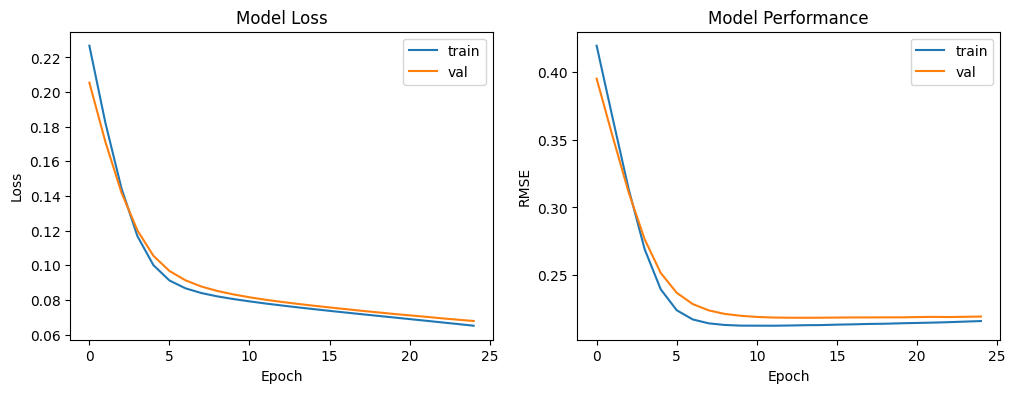

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['train', 'val'], loc='upper right')

ax[1].plot(history.history['rmse'])
ax[1].plot(history.history['val_rmse'])
ax[1].set_title('Model Performance')
ax[1].set_ylabel('RMSE')
ax[1].set_xlabel('Epoch')
ax[1].legend(['train', 'val'], loc='upper right')

plt.show()

# Recommeder System


In [112]:
def get_recommendations():
  user_id = int(input("Masukkan User ID (1 - 6317): "))
  if user_id <= num_users:
    reviewed_course_by_user = final_df[final_df.user_id == user_id]

    courses_not_reviewed = final_df[~(final_df.name
                                      .isin(reviewed_course_by_user.name.values)
                                      )]['course_id']
    courses_not_reviewed = list(
        set(courses_not_reviewed)
        .intersection(set(courses_decoded.keys()))
    )

    courses_not_reviewed = [[x] for x in courses_not_reviewed]
    user_courses_array = np.hstack(
        ([[user_id]] * len(courses_not_reviewed), courses_not_reviewed)
    )

    ratings = model.predict(user_courses_array, verbose=0).flatten()

    top_ratings_indices = ratings.argsort()[-10:][::-1]

    top_courses_user = reviewed_course_by_user.sort_values(
            by = 'rating',
            ascending=False
        ).head(10)

    if len(top_courses_user) >= 10:
        print('10 Kursus Teratas dengan rating tertinggi dari', users_decoded.get(user_id))
        print('-' * 24)
        print("| Course name : Rating |")
        print('-' * 24)
    else:
        num_of_courses = len(top_courses_user)
        print(num_of_courses, 'Kursus Teratas dengan rating tertinggi dari', users_decoded.get(user_id))
        print('-' * 24)
        print("| Course name : Rating |")
        print('-' * 24)

    for row in top_courses_user.itertuples():
        print(row.name, ':', row.rating)

    print("\nBerikut 10 kursus rekomendasi yang mungkin Anda sukai")

    recommended_courses = final_rating_df[final_rating_df['course_id']\
                                          .isin(top_ratings_indices)]

    top_10_recommended_courses = recommended_courses[['name',
                                                      'course_url',
                                                    'rating']].head(10)

    return top_10_recommended_courses
  else:
    print("ID user tidak ditemukan.")
    return get_recommendations()

In [114]:
recommended_courses = get_recommendations()
recommended_courses

5 Kursus Teratas dengan rating tertinggi dari Sergey G
------------------------
| Course name : Rating |
------------------------
Functional Programming Principles in Scala : 5.0
Machine Learning : 5.0
Blockchain Basics : 5.0
Neural Networks and Deep Learning : 5.0
Machine Learning Foundations: A Case Study Approach : 4.0

Berikut 10 kursus rekomendasi yang mungkin Anda sukai


,name,course_url,rating
24,Databases and SQL for Data Science,https://www.coursera.org/learn/sql-data-science,4.49
60,Introduction to Probability and Data with R,https://www.coursera.org/learn/probability-intro,4.62
66,Introduction to Systematic Review and Meta-Ana...,https://www.coursera.org/learn/systematic-review,4.70
75,Machine Learning for All,https://www.coursera.org/learn/uol-machine-lea...,4.68
86,Neural Networks and Deep Learning,https://www.coursera.org/learn/neural-networks...,4.70
94,Programming for Everybody (Getting Started wit...,https://www.coursera.org/learn/python,4.57
97,Python Programming: A Concise Introduction,https://www.coursera.org/learn/python-programm...,4.60
112,The Data Scientistâ€™s Toolbox,https://www.coursera.org/learn/data-scientists...,4.34
121,Writing in the Sciences,https://www.coursera.org/learn/sciwrite,4.84
